In [ ]:
import numpy as np
from scipy import stats, special, optimize, integrate # scipyモジュールの中のパッケージstats，special, optimize, integrateをインポート
import matplotlib.pyplot as plt
import seaborn as sns

# モジュール`scipy`について

モジュール`scipy`は，科学計算で利用される強力な道具を提供しており，統計学関係（`scipy.stats`）以外にも行列計算や，線形計画法などの最適化，数値積分などが含まれている（**KPなどにも利用できそうですね**）．

なお，`scipy`は`numpy`を基礎として設計されているため，この二者の親和性は高い．


## ガンマ関数のグラフの描画

ガンマ関数や楕円関数などの特殊関数は，サブモジュール`scipy.special`をインポートすることで，利用できる．
下の例では，ガンマ関数のグラフを描画する．
コードを実行してみよ．


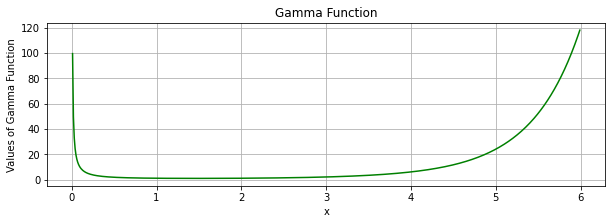

In [ ]:
gamma = lambda x: special.gamma(x)

x = np.arange(0.01, 6, .01) # 0.01以上6未満を0.01刻みしたリスト[0.01,0.02,...,5.99]

plt.figure(figsize=(10,3)) # 図のサイズの指定
plt.plot(x, gamma(x), "green") # ガンマ関数のグラフを上のリストの各値に対してプロットする
plt.title("Gamma Function")
plt.xlabel("x")
plt.ylabel("Values of Gamma Function")
plt.grid(True)
plt.show()

## 方程式の数値解

`scipy`によって，方程式の数値解を求めることもできる．
数学的に厳密な解ではないが，与えた初期値を起点として，厳密解に近づくように，近似的な解を与える方法が`scipy`には実装されている．
下の例では，ニュートン法（`optimize.newton`）と呼ばれる，微分法を応用したアルゴリズムによって数値解を計算している．
（計算機は方程式の解の数学的な意味を理解することはできないので，方程式を解くのは計算機に任せてしまって人間は方程式を忘れてよいということにはならない．）

Solution: 2.0000000000000004


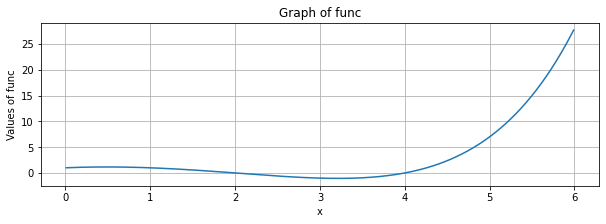

In [ ]:
func = lambda x: 2**x - x**2
sol = optimize.newton(func,1) # 1を初期値とするニュートン法と呼ばれるアルゴリズムに従って解を求めている．この1を2,3,4,5,6,...などに変えて，結果を観察してみよ．

plt.figure(figsize=(10,3))
plt.plot(x, func(x))
plt.title("Graph of func")
plt.xlabel("x")
plt.ylabel("Values of func")
plt.grid(True)
print("Solution:", sol) # 数値解の表示

Solution: 4.00000000000001


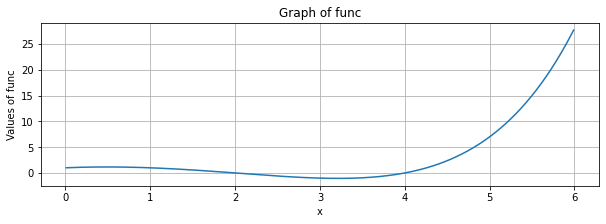

In [ ]:
func = lambda x: 2**x - x**2
sol = optimize.newton(func,5) # 1を初期値とするニュートン法と呼ばれるアルゴリズムに従って解を求めている．この1を2,3,4,5,6,...などに変えて，結果を観察してみよ．

plt.figure(figsize=(10,3))
plt.plot(x, func(x))
plt.title("Graph of func")
plt.xlabel("x")
plt.ylabel("Values of func")
plt.grid(True)
print("Solution:", sol) # 数値解の表示

## 数値積分

`scipy.integrate`を利用すれば，数値積分を行える．
No.10で分割数を設定して`for`ループにより計算していた積分$\displaystyle \int_0^1 \frac{4}{1 + x^2}\,dx$の値を，`scipy.integrate`を利用して求めてみよう．
（`scipy`により簡単に数値積分が求まるからといって，No.10での努力が無駄であると悲観することはない．計算の仕組みを初等的に書き下す訓練を通じて，真の意味で理解は深まるのである．）

In [ ]:
convtopi = lambda x: 4/(1 + x**2) # 被積分関数
intgrt = integrate.quad(convtopi, 0, 1) # quadはquadrature（求積法）から
print(intgrt) # (近似値, 誤差の範囲)

(3.1415926535897936, 3.4878684980086326e-14)


## 本題: 統計学周りのサブモジュール`scipy.stats`

統計計算では，`scipy`のサブモジュール`stats`が利用される．
ここでは，`scipy.stats`のメソッドのうち，授業で登場しそうなものを，紹介する．

「**確率分布.メソッド**」という構文で利用する．

### 確率分布

* 離散型確率分布
  * 二項分布（binomial distribution）`scipy.stats.binom`
  * ベルヌーイ分布（Bernoulli distribution）`scipy.stats.bernoulli`
  * ポアソン分布（Poisson distribution）`scipy.stats.poisson`
  * 幾何分布（geometric distribution）`scipy.stats.geom`

* 連続型確率分布
  * 一様分布（uniform distribution）`scipy.stats.uniform`
  * 正規分布（normal distribution）`scipy.stats.norm`
  * 指数分布（exponential distribution）`scipy.stats.expon`
  * ガンマ分布（gamma distribution）`scipy.stats.gamma`
  * ベータ分布（beta distribution）`scipy.stats.betabinom`

### メソッド

* 確率変数（random variables）`rvs`: 乱数を生成する

* 確率密度関数（probability density function）`pdf`: 連続型分布の確率密度関数を与える

* 確率質量関数（probability mass function）`pmf`: 離散型分布の確率質量関数を与える

* 対数確率密度関数（log of pdf）`logpdf`: 連続型確率分布の確率密度関数の対数を与える

* 累積分布関数（cumulative distribution function）`cdf`: 確率分布の累積分布関数を与える

* パーセント点関数（percent point function）`ppf`: 累積分布関数の値に対し，その累積確率を与える．

* 区間推定（interval estimation）`interval`: 信頼区間を与える（次回）


例えば，標準正規分布$N(0,1)$に従う乱数を10個生成し，変数`data`に格納する場合は，
```
data = sp.stats.norm.rvs(loc=0 ,scale=1, size=10)
```
と書く．

正規分布$N(50,10)$に従う確率変数$X$に対して，確率$P(45 \leqq X \leqq 60)$の値を計算したい場合は，累積分布関数の差$P(X \leqq 60) - P(X \leqq 45)$と考えて
```
sp.stats.norm.cdf(60, loc=50, scale=10) - sp.stats.norm.cdf(45, loc=50, scale=10)
```
と書く．

ガンマ分布
$$
\text{G}_{\text{A}}\left(2,\frac{1}{2}\right),\text{G}_{\text{A}}\left(5,\frac{1}{2}\right),\text{G}_{\text{A}}\left(2,\frac{5}{2}\right),\text{G}_{\text{A}}\left(5,\frac{5}{2}\right)
$$
の確率密度関数のグラフを，$0 < x < 5$の範囲で描画したい場合は，
```
# 描画範囲の指定
plt.figure(figsize=(10,6))
x = np.arange(0.01,5,.01) # 0.01以上5未満の0.01刻みの数値のリストをxに格納．[0.00, 0.01, 0.02, ..., 4.99]
# ガンマ分布の密度関数の定義
gamma1 = lambda t: sp.stats.gamma.pdf(t, 2.0, scale=0.5)
gamma2 = lambda t: sp.stats.gamma.pdf(t, 5.0, scale=0.5)
gamma3 = lambda t: sp.stats.gamma.pdf(t, 2.0, scale=2.5)
gamma4 = lambda t: sp.stats.gamma.pdf(t, 5.0, scale=2.5)

# ガンマ分布の密度関数のグラフの描画，plot(x座標，y座標，色，ラベル)
plt.plot(x, gamma1(x), "pink", label="Gamma(2,0.5)")
plt.plot(x, gamma2(x), "purple", label="Gamma(5,0.5)")
plt.plot(x, gamma3(x), "olive", label="Gamma(2,2.5)")
plt.plot(x, gamma4(x), "midnightblue", label="Gamma(5,2.5)")

plt.title("Gamma Distributions") # タイトル
plt.xlabel("x") # 軸の名称
plt.ylabel("Density")
plt.grid(True, linestyle="dashed") # グリッドの線種を破線に
plt.legend() # 凡例の表示（上のグラフ描画関数において，ラベルを指定しておく）
plt.show() # 描画したものを見せろ！
```
と書く．
試しに，下のコードを実行してみよ．


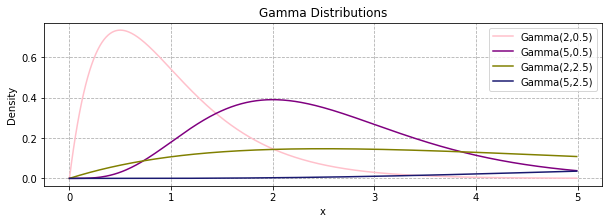

In [ ]:
x = np.arange(0,5,.01)
gamma1 = lambda t: stats.gamma.pdf(t, 2.0, scale=.5)
gamma2 = lambda t: stats.gamma.pdf(t, 5.0, scale=.5)
gamma3 = lambda t: stats.gamma.pdf(t, 2.0, scale=2.5)
gamma4 = lambda t: stats.gamma.pdf(t, 5.0, scale=2.5)

plt.figure(figsize=(10,3))
plt.plot(x, gamma1(x), "pink", label="Gamma(2,0.5)")
plt.plot(x, gamma2(x), "purple", label="Gamma(5,0.5)")
plt.plot(x, gamma3(x), "olive", label="Gamma(2,2.5)")
plt.plot(x, gamma4(x), "midnightblue", label="Gamma(5,2.5)")
plt.title("Gamma Distributions")
plt.xlabel("x")
plt.grid(True, linestyle="dashed")
plt.ylabel("Density")
plt.legend()
plt.show()

# 実験: 正規分布からのランダムサンプリング

ここでは，任意に平均と標準偏差を設定した正規分布から無作為抽出による標本を抽出し，その標本平均や標本分散の挙動を確認する実験を行う．

### 下準備，条件設定

1. 正規分布の平均（`Loc`）と標準偏差（`Scl`）を設定
2. 標本の大きさ（`Size`）を設定
3. 今回は正規分布からの標本の抽出回数を`1000`回に設定

### データ処理

1. 空リストの作成（標本平均`Means`，不偏でない標本分散`BVar`，不偏標本分散`UBVar`）
2. `1000`回の各試行において，得られた`Size`個の正規乱数列$[x_1,x_2,\ldots,x_{1000}]$の標本平均$\overline{X} = \frac{1}{1000} \sum_{k = 1}^{1000}x_k$，不偏でない標本分散$S = \frac{1}{1000} \sum_{k = 1}^{1000} (x_k - \overline{X})^2$，不偏標本分散$\hat{S} = \frac{1}{1000 - 1} \sum_{k = 1}^{1000} (x_k - \overline{X})^2$を，それぞれリスト`Means`，`BVar`，`UBVar`の最後尾に加えていく．
3. リスト`Means`，`BVar`，`UBVar`の初項からの累積和（$l$番目の累積和とは，初項から$l$番目までの和のこと）を順にそれぞれ`CumMeans`，`CumBVar`，`CumUBVar`に格納していく（`np.cumsum()`は累積和からなる配列を与える関数）．
`divisor`はリスト`[1,2,...,1000]`のことである．
4. `CumMeans / divisor`によって，標本平均の初項からの累積の平均からなる配列が作られる．
5. 母平均，母分散を与える定数関数`ConstPopMean`と`ConstPopVar`を定義する．

### グラフ描画

今回は6種類のグラフを$2 \times 3$の配置で描画する．

1. `plt.subplot(2,3,n)`は，$2\times 3$の配置を左上から数えた`n`番目の図を描画するときに利用する．
2. 上の3列のグラフは，無作為抽出したデータの標本平均，不偏でない標本分散，不偏標本分散のヒストグラムと理論から予想される分布とを比較している．
特に，$(1,2)$の位置にある不偏でない標本分散と$(1,3)$の位置にある不偏標本分散のヒストグラムは，一見似た分布をしているが，横軸，縦軸の目盛に注意して分析されたい．
3. 下の3列のグラフは，得られた標本統計量の累積の平均の推移をプロットしたグラフと母平均，母分散を比較している．

### 考察

特に，標本の大きさ（`Size`）を変化させたときに，不偏でない標本分散と不偏標本分散の振る舞いの違いについて，その意味を考えながら，考察をまとめよ．

（ここに考察を記入する）
サンプル数`Size`を増やせば，標本平均が母平均付近に集まるような傾向を見せることを実感してほしい．
また，サンプル数が`Size = 10`程度であると，不偏分散（Unbiased）と不偏でない分散（Biased）とで傾向に大きな差があることが観察される．不偏分散はより精度の高い統計分析を行う際に必須であることが見て取れる．

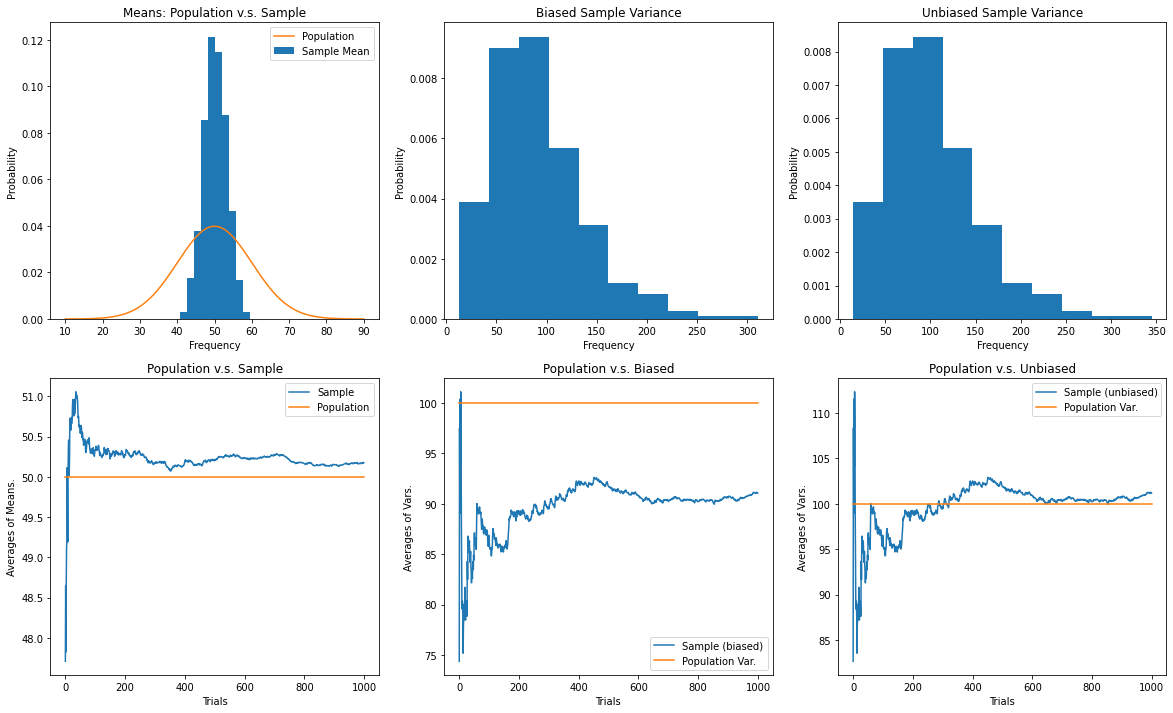

In [ ]:
# 正規分布の平均と標準偏差を設定
Loc, Scl = 50, 10

# 標本の大きさを設定（2,5,10,20,50,100で実行してみるのがおすすめ）
Size = 10

# 標本の抽出回数．今回は触らない（触ってもいいけど）
T = 1000

# リストの定義（初期値は空リスト，直後のforループでデータを格納していく）
Means = np.array([]) # 標本平均のリスト
BVar = np.array([]) # 不偏でない（Biased）標本分散のリスト
UBVar = np.array([]) # 不偏（Unbiased）標本分散のリスト

for i in range(T):
  # dataに正規乱数の標本を格納
  data = stats.norm.rvs(loc=Loc, scale=Scl, size=Size)
  # mには標本平均を格納
  m = np.mean(data)
  # 分散（ddof=0ならdataを母集団とみなした（不偏でない）分散，ddof=1ならdataを標本とみなした（不偏）分散
  bv = np.var(data, ddof=0) # 不偏でない標本分散
  ubv = np.var(data, ddof=1) #不偏標本分散
  # リストに値を加える
  Means = np.append(Means, m)
  BVar = np.append(BVar, bv)
  UBVar = np.append(UBVar, ubv)

# リストの値を前から順に加え（cumsum）たリストを作る
CumMeans = np.cumsum(Means)
CumBVar = np.cumsum(BVar)
CumUBVar = np.cumsum(UBVar)
divisor = np.arange(1,T+1) # リスト[1,2,...,T]（1以上T+1未満）

# numpyのリストどうしの割り算（成分ごとの割り算）->リストMeans，BVar，UBVarの初項から順に平均値をもったリスト
MMeans = CumMeans / divisor
MBVar = CumBVar / divisor
MUBVar = CumUBVar / divisor

# 母平均（Loc），母分散（Scl**2）をT個並べたリスト（定数関数の役割）
ConstPopMean = np.full(T, Loc)
ConstPopVar = np.full(T, Scl**2)

plt.figure(figsize=(20,12))

# 母集団の正規分布の確率密度関数と標本平均のヒストグラム
plt.subplot(2,3,1) # 2*3の配置の図の1つ目
x = np.arange(Loc - 4*Scl, Loc + 4*Scl, 0.01)
plt.hist(Means,density=True,label="Sample Mean") # 標本平均のヒストグラム，density=Trueなので，相対度数
plt.plot(x,stats.norm.pdf(x,loc=Loc,scale=Scl),label="Population") # 母集団である正規分布N(Loc,Scl)の確率密度関数
plt.legend()
plt.title("Means: Population v.s. Sample")
plt.xlabel("Frequency")
plt.ylabel("Probability")

# 不偏でない標本分散のヒストグラム
plt.subplot(2,3,2)
plt.hist(BVar,density=True) # 不偏でない標本分散のヒストグラム
plt.title("Biased Sample Variance")
plt.xlabel("Frequency")
plt.ylabel("Probability")

# 不偏標本分散のヒストグラム
plt.subplot(2,3,3)
plt.hist(UBVar,density=True) # 不偏標本分散のヒストグラム
plt.title("Unbiased Sample Variance")
plt.xlabel("Frequency")
plt.ylabel("Probability")

# 標本平均の平均の推移（x軸: 標本数，y軸: 標本平均の平均）
plt.subplot(2,3,4)
plt.plot(MMeans,label="Sample") # 標本平均の平均の推移
plt.plot(ConstPopMean,label="Population") # 母平均（定数関数Loc）
plt.legend()
plt.title("Population v.s. Sample")
plt.xlabel("Trials")
plt.ylabel("Averages of Means.")

# 不偏でない標本分散の平均の推移（x軸: 標本数，y軸: 不偏でない標本分散の平均）
plt.subplot(2,3,5)
plt.plot(MBVar,label="Sample (biased)") # 不偏でない標本分散の平均の推移
plt.plot(ConstPopVar,label="Population Var.") # 母分散（定数関数Scl**2）
plt.legend()
plt.title("Population v.s. Biased")
plt.xlabel("Trials")
plt.ylabel("Averages of Vars.")

# 不偏標本分散の平均の推移（x軸: 標本数，y軸: 不偏標本分散の平均）
plt.subplot(2,3,6)
plt.plot(MUBVar,label="Sample (unbiased)") # 不偏標本分散の平均
plt.plot(ConstPopVar,label="Population Var.") # 母分散（定数関数Scl**2）
plt.legend()
plt.title("Population v.s. Unbiased")
plt.xlabel("Trials")
plt.ylabel("Averages of Vars.")

plt.show()

# ＜本授業の学び＞
本授業で学んだことを，下のテキストボックスに記入して下さい．

（ここに本授業の学びを記入する）